# Implementing a Predictor from scratch

For this project, the dataset Indicadores_municipales_sabana_DA.csv was used, which gives us the poverty indicator for each municipality, as well as other data related to the level of poverty.
The indicator I used was the column gini_10, which gives us the number of the Gini coefficient for the year 2010 (the Gini coefficient is a number that indicates the average level of economic inequality and how big the gap is between rich and poor in an location).
This feature is a regression problem since it attempts to predict the Gini coefficient using all the additional data in the dataset. The problem we are trying to solve is to predict the level of economic inequality in the society of each municipality in 2010.

## Programm

The first thing to do was import the necessary libraries that we are going to use for data separation, as well as some more for programming the regression model and print the results.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

First we upload the dataset to the program using Pandas, and then we load it into a data frame. This is to work better with the dataset data.

In [2]:
# Ruta al archivo local
file_path = 'C:/Users/angel/OneDrive/Desktop/Tareas/Machine Learning/Pobreza/Indicadores_municipales_sabana_DA.csv'

# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_csv(file_path, encoding='latin-1')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.head()

,ent,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
0,1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
2,1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
3,1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
4,1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083


We separate the X and the Y. The (As we are doing a regression exercise, there are some features that do not interest us since they are classification, such as the position that a certain municipality occupies among other municipalities). Our Y is the feature gini_10 that we are going to work with.

In [3]:
X = df.drop(columns=['ent','nom_ent','mun','clave_mun','nom_mun','gini_10'])
N_mun = df['nom_mun']
y = df['gini_10']

In [4]:
label_encoder = LabelEncoder()

X['gdo_rezsoc00'] = label_encoder.fit_transform(X['gdo_rezsoc00'])
X['gdo_rezsoc05'] = label_encoder.fit_transform(X['gdo_rezsoc05'])
X['gdo_rezsoc10'] = label_encoder.fit_transform(X['gdo_rezsoc10'])

imputer = SimpleImputer(strategy="mean")

X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_imputed)

We separate the X and Y data on a scale of 80/20

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

We define the calculate error function, which calculates the distance between the predicted data and the actual data.

In [6]:
def calcular_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

We now define the gradient descent function as our prediction model. This function has a for which will do the prediction calculations, find the errors using the function established above, store these errors (this is for something we will do later), calculate the weight and bias gradients and finally update these weights and biases.

In [12]:
def descenso_gradiente(X, y, X_test, y_test, learning_rate=0.001, epochs=10000):
    num_muestras, num_caracteristicas = X.shape
    pesos = np.zeros(num_caracteristicas)
    sesgo = 0
    
    errores_entrenamiento = []  # Almacenar errores durante el entrenamiento
    errores_prueba = []  # Almacenar errores en el conjunto de prueba
    
    for _ in range(epochs):
        # Calcular predicciones
        predicciones = np.dot(X, pesos) + sesgo
        predicciones_test = np.dot(X_test, pesos) + sesgo
        
        # Calcular el error en el conjunto de entrenamiento y prueba
        error_entrenamiento = calcular_error(y, predicciones)
        error_prueba = calcular_error(y_test, predicciones_test)
        
        # Almacenar errores
        errores_entrenamiento.append(error_entrenamiento)
        errores_prueba.append(error_prueba)
        
        # Calcular gradientes
        gradientes_pesos = -(1/num_muestras) * np.dot(X.T, (y - predicciones))
        gradiente_sesgo = -(1/num_muestras) * np.sum(y - predicciones)
        
        # Actualizar pesos y sesgo usando el descenso del gradiente
        pesos -= learning_rate * gradientes_pesos
        sesgo -= learning_rate * gradiente_sesgo
    
    return pesos, sesgo, errores_entrenamiento, errores_prueba

Here we train our model by entering the data from our training and testing Xs and our training and testing Ys into the gradient descent function.

In [13]:
pesos, sesgo, errores_entrenamiento, errores_prueba = descenso_gradiente(X_train, Y_train, X_test, Y_test)

In order to see if our model trained well, we look to obtain its mean square error. To do this we take our predictions and, using the calcular_error function, we compare them with our test data. The closer it is to 0, it means it is well trained.

In [14]:
y_pred = np.dot(X_test, pesos) + sesgo

mse = calcular_error(Y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")

Error Cuadrático Medio: 0.0006522538701210831


And to check our results, we take a random municipality, and compare its predicted data with the actual data.

In [15]:
import random
    
indice_aleatorio = random.choice(range(len(Y_test)))

nombre_municipio = N_mun.iloc[indice_aleatorio]
prediccion_desigualdad = y_pred[indice_aleatorio]
desigualdad_actual = Y_test.iloc[indice_aleatorio]

print(f"Para el municipio {nombre_municipio}, se predice que el coeficiente de Gini para el 2010 es de {prediccion_desigualdad}. El valor actual de desigualdad es {desigualdad_actual}.")

Para el municipio Comala, se predice que el coeficiente de Gini para el 2010 es de 0.42341684321634804. El valor actual de desigualdad es 0.404218495.


And finally we graph the results, to see how our testing data is dispersed and how our model cuts through the data right in the middle.

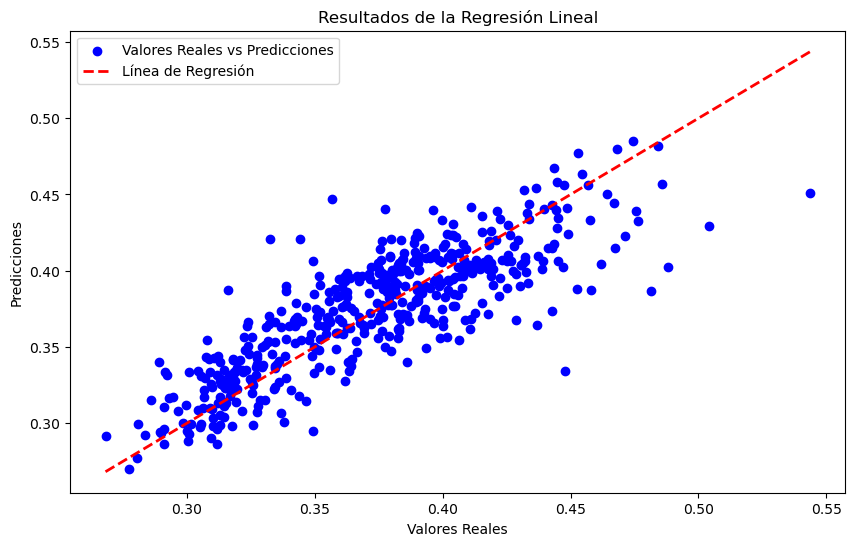

In [16]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue', label='Valores Reales vs Predicciones')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linewidth=2, color='red', linestyle='--', label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Resultados de la Regresión Lineal')
plt.legend()
plt.show()